In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from pydataset import data
from env import get_db_url
# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
# import our own data modules
import acquire
import prepare

# Classification
* Supervised machine learning
* Is this new observation A or B (or C, D, or E)?
* Categorical


- `Classifier`:
    - Binary = 2 outcomes = pass/fail
    - Multi-class = 2+ classes = school grade levels (1st-12th)
- `Algorithm` vs `Model`: General vs Specific
- `Feature`: A feature, aka input/independent variable, is an individual measurable property of a phenom being observed
- `Database` vs `Dataset`: DB has datasets

#### sklearn classification models
- Logistic Regression (sklearn.linear_model.LogisticRegression)
    - Predict binary outcome
- Decision Tree (sklearn.tree.DecisionTreeClassifier)
    - tree splitting data based on rules
- K-Nearest Neighbors (sklearn.neighbors.KNeighborsClassifier)
    - looks at plotted neighbors to id data
- Random Forest (sklearn.ensemble.RandomForestClassifier)
    - decision trees within a decision tree and goes with majority

## Data Acquisition


CSV
- `pd.read_csv(`url`)`
    - url = google_sheets`.replace(`'/edit#gid=', '/export?format=csv&gid='`)`


Clipboard (table in text)
- `pd.read_clipboard()`


MS Excel
- `pd.read_excel(`url`)`


SQL
- `pd.read_sql(`sql_query,sql_url`)`

Caching Data
- df`.to_csv(`new_filename.csv`)`

In [2]:
# import os

# def get_titanic_data():
#     filename = "titanic.csv"

#     if os.path.isfile(filename):
#         return pd.read_csv(filename)
#     else:
#         # read the SQL query into a dataframe
#         df = pd.read_sql('SELECT * FROM passengers', get_connection('telco_db'))

#         # Write that dataframe to disk for later. Called "caching" the data for later.
#         df.to_file(filename)

#         # Return the dataframe to the calling code
#         return df 

### Exercises

Use a python module (pydata or seaborn datasets) containing datasets as a source for the iris data. Create a pandas dataframe, `df_iris`, from this data

In [3]:
df_iris = data('iris')

In [4]:
# print the first 3 rows
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [5]:
# print the number of rows and columns (shape)
df_iris.shape

(150, 5)

In [6]:
# print the column names
df_iris.columns.to_list()

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

In [7]:
# print the data type of each column
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [8]:
# print the summary statistics for each of the numeric variables
df_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Read the data from this google sheet into a dataframe, `df_google`.


In [9]:
gsh = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit?usp=sharing'
url = gsh.replace('/edit?', '/export?format=csv&')
df_google = pd.read_csv(url)

In [10]:
# print the first 3 rows
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [11]:
# print the number of rows and columns
df_google.shape

(891, 12)

In [12]:
# print the column names
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
# print the data type of each column
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
# print the summary statistics for each of the numeric variables
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
# print the unique values for each of your categorical variables
for i in ['Survived', 'Pclass', 'Sex', 'SibSp','Parch', 'Embarked']:
    print(df_google[i].unique())

[0 1]
[3 1 2]
['male' 'female']
[1 0 3 4 2 5 8]
[0 1 2 5 3 4 6]
['S' 'C' 'Q' nan]


Download the previous exercise's file into an excel (File → Download → Microsoft Excel). Read the downloaded file into a dataframe named `df_excel`.

In [16]:
df_excel = pd.read_excel('train.xlsx', sheet_name='train')

In [17]:
# assign the first 100 rows to a new dataframe, df_excel_sample
df_excel_sample = df_excel.head(100)

In [18]:
# print the number of rows of your original dataframe
df_excel.shape[0]

891

In [19]:
# print the first 5 column names
df_excel.columns[:5]

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex'], dtype='object')

In [20]:
# print the column names that have a data type of object
df_excel.select_dtypes(include='object').columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [21]:
# compute the range for each of the numeric variables.
for i in ['Age','Fare']:
    print(i, df_excel[i].max() - df_excel[i].min())

Age 79.58
Fare 512.3292


Make a new python module, acquire.py to hold the following data acquisition functions:



- Make a function named get_titanic_data that returns the titanic data from the codeup data science database as a pandas data frame. Obtain your data from the Codeup Data Science Database.



In [22]:
import os

In [23]:
def titanic_data():
    """
    This function checks if a CSV file exists, reads it if it does, and if not, reads data from a SQL
    database, saves it to a CSV file, and returns the data.
    :return: The function `get_titanic_data()` returns a pandas DataFrame containing the Titanic
    passenger data. If the data has been previously cached as a CSV file, it reads the data from the
    file. Otherwise, it reads the data from a SQL database, caches it as a CSV file, and returns the
    DataFrame.
    """
    filename = "titanic.csv"
    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else:
        # read the SQL query into a dataframe
        df = pd.read_sql('select * from passengers', get_db_url('titanic_db'))
        # Write that dataframe to disk for later. Called "caching" the data for later.
        df.to_csv(filename, index=False)
        # Return the dataframe to the calling code
        return df

- Make a function named get_iris_data that returns the data from the iris_db on the codeup data science database as a pandas data frame. The returned data frame should include the actual name of the species in addition to the species_ids. Obtain your data from the Codeup Data Science Database.



In [24]:
def iris_data():
    """
    This function checks if a CSV file exists, and if it does, it returns the data from the file,
    otherwise it reads data from a SQL database, saves it to a CSV file, and returns the data.
    :return: The function `get_iris_data()` returns a pandas DataFrame containing the iris data. If the
    data is already cached in a CSV file named "iris.csv", it reads the data from the file. Otherwise,
    it reads the data from a SQL database named "iris_db", joins the "species" and "measurements"
    tables, caches the data in a CSV file, and returns the DataFrame.
    """
    filename = "iris.csv"
    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else:
        # read the SQL query into a dataframe
        df = pd.read_sql('select * from species join measurements using (species_id)', get_db_url('iris_db'))
        # Write that dataframe to disk for later. Called "caching" the data for later.
        df.to_csv(filename, index=False)
        # Return the dataframe to the calling code
        return df

- Make a function named get_telco_data that returns the data from the telco_churn database in SQL. In your SQL, be sure to join contract_types, internet_service_types, payment_types tables with the customers table, so that the resulting dataframe contains all the contract, payment, and internet service options. Obtain your data from the Codeup Data Science Database.



In [25]:
def telco_data():
    """
    This function reads telco data from a CSV file if it exists, otherwise it reads the data from a SQL
    database and saves it to the CSV file for future use.
    :return: The function `get_telco_data()` returns a pandas DataFrame containing data from either a
    CSV file named "telco.csv" or a SQL query from a database named "telco_churn". If the CSV file
    exists, it reads the data from the file, otherwise it reads the data from the SQL query, saves it to
    the CSV file for caching, and returns the DataFrame.
    """
    filename = "telco.csv"
    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else:
        # read the SQL query into a dataframe
        df = pd.read_sql('select * from customers join contract_types using(contract_type_id) join internet_service_types using(internet_service_type_id) join payment_types using(payment_type_id)', get_db_url('telco_churn'))
        # Write that dataframe to disk for later. Called "caching" the data for later.
        df.to_csv(filename, index=False)
        # Return the dataframe to the calling code
        return df

- Once you've got your get_titanic_data, get_iris_data, and get_telco_data functions written, now it's time to add caching to them. To do this, edit the beginning of the function to check for the local filename of telco.csv, titanic.csv, or iris.csv. If they exist, use the .csv file. If the file doesn't exist, then produce the SQL and pandas necessary to create a dataframe, then write the dataframe to a .csv file with the appropriate name.

In [26]:
import acquire

## Data Preparation

Summarize data:
- `head()`, `describe()`, `info()`, `isnull()`, `value_counts()`, `shape`, ...
- looking at one var at a time
- know what the columns mean/represent
- know what the rows mean/represent
    - 1 unique obs per row
- visualize
    - `plt.hist()`, `plt.boxplot()`
- document takeaways (nulls, dtypes to change, outliers, ideas for features, etc.)

Clean data:
- `nulls/missing values`: drop columns/rows with too many missing values, fill with 0 (or mode/max/min), take note of applicable columns/rows
    - `.isnull()`
    - `.value_counts(dropna=False)`
    - `.fillna(value=`''`)`
    - df = df`.drop(columns=`''`)`
- `outlier`: obs distant from other observations
    - ignore, drop rows, snap to selected max/min, create bins (cut, qcut)
- `create new` variables (z = x - y)
- `rename` columns
- `encoding/data-types`: need numeric data for model (dummy vars, factor vars, manual coding)
    - `pd.get_dummies(`df.col, `drop_first=`True`)`

Split data:
- `split` to train, validate, test sample dataframes
    - from sklearn.model_selection import train_test_split
    - `train_test_split(`df, `random_state=`123, `test_size=`.2, `stratify=`target_var`)`
- `train`: in-sample, explore, impute mean, scale numeric data (max-min...), fit ml algorithms, test models
- `validate`: confirm top models don't overfit, test on unseen data
    - validate performance, pick best model
- `test`: out-of-sample, expected model performance on unseen data
    - only used on 1 model


Impute Missing Values
- from sklearn.impute import SimpleImputer
- split then impute to keep unseen data true
- imputer = `SimpleImputer(missing_values =` None, `strategy=`'most_frequent'`)`
- imputer = `imputer.fit(`col`)`
- train[col] = `imputer.transform(`train[col]`)`
    - same for validate and test
- impute or fillna

### Exercises

Using the Iris Data:

- Use the function defined in `acquire.py` to load the iris data.



In [27]:
iris = acquire.get_iris_data()
iris.sample(5)

csv file found and loaded


,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
138,3,virginica,139,6.0,3.0,4.8,1.8
4,1,setosa,5,5.0,3.6,1.4,0.2
51,2,versicolor,52,6.4,3.2,4.5,1.5
145,3,virginica,146,6.7,3.0,5.2,2.3
12,1,setosa,13,4.8,3.0,1.4,0.1


- Drop the `species_id` and `measurement_id` columns.



In [28]:
iris = iris.drop(columns=['species_id','measurement_id'])
iris.sample(5)

,species_name,sepal_length,sepal_width,petal_length,petal_width
37,setosa,4.9,3.6,1.4,0.1
2,setosa,4.7,3.2,1.3,0.2
148,virginica,6.2,3.4,5.4,2.3
10,setosa,5.4,3.7,1.5,0.2
13,setosa,4.3,3.0,1.1,0.1


- Rename the `species_name` column to just `species`.



In [29]:
iris = iris.rename(columns={'species_name':'species'})
iris.sample(5)

,species,sepal_length,sepal_width,petal_length,petal_width
72,versicolor,6.3,2.5,4.9,1.5
37,setosa,4.9,3.6,1.4,0.1
148,virginica,6.2,3.4,5.4,2.3
50,versicolor,7.0,3.2,4.7,1.4
29,setosa,4.7,3.2,1.6,0.2


- Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).



In [30]:
dummy_iris = pd.get_dummies(iris.species, drop_first=True)
dummy_iris.sample(5)

,versicolor,virginica
148,0,1
32,0,0
55,1,0
58,1,0
97,1,0


In [31]:
iris = pd.concat([iris, dummy_iris], axis=1)
iris.sample(5)

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
148,virginica,6.2,3.4,5.4,2.3,0,1
147,virginica,6.5,3.0,5.2,2.0,0,1
144,virginica,6.7,3.3,5.7,2.5,0,1
123,virginica,6.3,2.7,4.9,1.8,0,1
113,virginica,5.7,2.5,5.0,2.0,0,1


- Create a function named `prep_iris` that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [32]:
def prep_iris(iris):
    # clean
    iris = iris.drop_duplicates()
    iris = iris.drop(columns=['species_id','measurement_id'])
    iris = iris.rename(columns={'species_name':'species'})
    dummy_iris = pd.get_dummies(iris.species, drop_first=True)
    iris = pd.concat([iris, dummy_iris], axis=1)
    print('data cleaned and prepped')
    return iris


In [33]:
iris = acquire.get_iris_data()
iris = prep_iris(iris)
iris.sample(5)

csv file found and loaded
data cleaned and prepped


,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
62,versicolor,6.0,2.2,4.0,1.0,1,0
88,versicolor,5.6,3.0,4.1,1.3,1,0
44,setosa,5.1,3.8,1.9,0.4,0,0
89,versicolor,5.5,2.5,4.0,1.3,1,0
16,setosa,5.4,3.9,1.3,0.4,0,0


Using the Titanic Data:

- Use the function defined in `acquire.py` to load the Titanic data.



In [34]:
titanic = acquire.get_titanic_data()
titanic.sample(5)

csv file found and loaded


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
452,452,0,1,male,30.0,0,0,27.7500,C,First,C,Cherbourg,1
314,314,0,2,male,43.0,1,1,26.2500,S,Second,NaN,Southampton,0
266,266,0,3,male,16.0,4,1,39.6875,S,Third,NaN,Southampton,0
738,738,0,3,male,NaN,0,0,7.8958,S,Third,NaN,Southampton,1
315,315,1,3,female,26.0,0,0,7.8542,S,Third,NaN,Southampton,1


- Drop any unnecessary, unhelpful, or duplicated columns.



In [35]:
titanic = titanic.drop(columns=['age','class','deck','embark_town'])
titanic.sample(5)

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone
671,671,0,1,male,1,0,52.0000,S,0
423,423,0,3,female,1,1,14.4000,S,0
646,646,0,3,male,0,0,7.8958,S,1
871,871,1,1,female,1,1,52.5542,S,0
888,888,0,3,female,1,2,23.4500,S,0


- Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.



In [36]:
dummy_titanic = pd.get_dummies(titanic[['sex','embarked']], drop_first=True)
dummy_titanic.drop_duplicates()

,sex_male,embarked_Q,embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
5,1,1,0
22,0,1,0
26,1,0,0


In [37]:
titanic = pd.concat([titanic, dummy_titanic], axis=1)
titanic.sample(5)

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
72,72,0,2,male,0,0,73.5000,S,1,1,0,1
455,455,1,3,male,0,0,7.8958,C,1,1,0,0
586,586,0,2,male,0,0,15.0000,S,1,1,0,1
156,156,1,3,female,0,0,7.7333,Q,1,0,1,0
26,26,0,3,male,0,0,7.2250,C,1,1,0,0


- Create a function named `prep_titanic` that accepts the raw titanic data, and returns the data with the transformations above applied.



In [38]:
def prep_titanic(titanic):
    # clean
    titanic = titanic.drop_duplicates()
    titanic = titanic.drop(columns=['age','class','deck','embark_town'])
    titanic['embarked'] = titanic.embarked.fillna(value='S')
    dummy_titanic = pd.get_dummies(titanic[['sex','embarked']], drop_first=True)
    titanic = pd.concat([titanic, dummy_titanic], axis=1)
    print('data cleaned and prepped')
    return titanic

In [39]:
titanic = acquire.get_titanic_data()
titanic = prep_titanic(titanic)
titanic.sample(5)

csv file found and loaded
data cleaned and prepped


,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
573,573,1,3,female,0,0,7.7500,Q,1,0,1,0
4,4,0,3,male,0,0,8.0500,S,1,1,0,1
185,185,0,1,male,0,0,50.0000,S,1,1,0,1
65,65,1,3,male,1,1,15.2458,C,0,1,0,0
556,556,1,1,female,1,0,39.6000,C,0,0,0,0


Using the Telco Data:

- Use the function defined in `acquire.py` to load the Telco data.



In [40]:
telco = acquire.get_telco_data()
telco.sample(5)

csv file found and loaded


,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
1255,1,2,1,1853-UDXBW,Male,0,Yes,Yes,1,Yes,...,No,No,No,Yes,70.00,70,Yes,Month-to-month,Fiber optic,Electronic check
1433,2,3,1,2111-DWYHN,Male,0,No,No,1,Yes,...,No internet service,No internet service,No internet service,No,21.10,21.1,No,Month-to-month,None,Mailed check
39,3,2,1,0064-YIJGF,Male,0,Yes,Yes,27,Yes,...,No,No,No,Yes,75.75,1929,No,Month-to-month,Fiber optic,Bank transfer (automatic)
3483,2,3,3,4933-BSAIP,Female,0,Yes,No,40,Yes,...,No internet service,No internet service,No internet service,No,19.10,780.1,No,Two year,None,Mailed check
6083,1,2,1,8623-TMRBY,Male,1,Yes,Yes,51,Yes,...,No,No,No,Yes,84.20,4146.05,Yes,Month-to-month,Fiber optic,Electronic check


- Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.



In [41]:
telco.sample()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
4506,3,1,2,6352-GIGGQ,Male,0,No,No,67,Yes,...,Yes,Yes,Yes,Yes,88.8,5903.15,No,One year,DSL,Bank transfer (automatic)


In [42]:
telco = telco.drop(columns=['customer_id','payment_type_id','internet_service_type_id','contract_type_id'])
telco.shape

(7043, 20)

In [43]:
telco.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'total_charges', 'churn',
       'contract_type', 'internet_service_type', 'payment_type'],
      dtype='object')

In [44]:
telco.total_charges[telco.total_charges==' ']=0
telco.total_charges = telco.total_charges.astype(float)
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 7043 non-null   object 
 1   senior_citizen         7043 non-null   int64  
 2   partner                7043 non-null   object 
 3   dependents             7043 non-null   object 
 4   tenure                 7043 non-null   int64  
 5   phone_service          7043 non-null   object 
 6   multiple_lines         7043 non-null   object 
 7   online_security        7043 non-null   object 
 8   online_backup          7043 non-null   object 
 9   device_protection      7043 non-null   object 
 10  tech_support           7043 non-null   object 
 11  streaming_tv           7043 non-null   object 
 12  streaming_movies       7043 non-null   object 
 13  paperless_billing      7043 non-null   object 
 14  monthly_charges        7043 non-null   float64
 15  tota

/var/folders/ml/8_q6055n29vf0c36kmj6w1900000gn/T/ipykernel_42228/631193109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telco.total_charges[telco.total_charges==' ']=0


In [45]:
telco_obj = telco.select_dtypes(include='object').columns.to_list()

In [60]:
for i in telco_obj:
    print(i,telco[i].unique())

gender ['Female' 'Male']
partner ['Yes' 'No']
dependents ['Yes' 'No']
phone_service ['Yes' 'No']
multiple_lines ['No' 'Yes' 'No phone service']
online_security ['No' 'Yes' 'No internet service']
online_backup ['Yes' 'No' 'No internet service']
device_protection ['No' 'Yes' 'No internet service']
tech_support ['Yes' 'No' 'No internet service']
streaming_tv ['Yes' 'No' 'No internet service']
streaming_movies ['No' 'Yes' 'No internet service']
paperless_billing ['Yes' 'No']
churn ['No' 'Yes']
contract_type ['One year' 'Month-to-month' 'Two year']
internet_service_type ['DSL' 'Fiber optic' 'None']
payment_type ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [47]:
telco.isnull().sum()

gender                   0
senior_citizen           0
partner                  0
dependents               0
tenure                   0
phone_service            0
multiple_lines           0
online_security          0
online_backup            0
device_protection        0
tech_support             0
streaming_tv             0
streaming_movies         0
paperless_billing        0
monthly_charges          0
total_charges            0
churn                    0
contract_type            0
internet_service_type    0
payment_type             0
dtype: int64

- Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.



In [ ]:
# telco.gender.map({'Female':1,'Male':0})

In [48]:
dummy_telco = pd.get_dummies(telco[telco_obj], drop_first=True)
dummy_telco.sample(5)

,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
6713,1,0,0,1,0,0,1,0,1,0,...,0,1,0,1,0,0,1,1,0,0
2666,1,1,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2057,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
3989,0,0,0,1,0,0,1,0,1,0,...,0,1,0,0,0,0,1,0,1,0
347,1,0,1,1,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1


In [49]:
telco = pd.concat([telco, dummy_telco], axis=1)
telco.sample(5)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5914,Male,0,No,No,37,Yes,No,No internet service,No internet service,No internet service,...,0,0,0,1,0,0,1,1,0,0
5378,Male,1,No,No,34,Yes,No,No,No,No,...,0,0,0,0,0,1,0,1,0,0
7009,Male,0,No,No,32,Yes,Yes,No,No,No,...,1,1,0,0,0,1,0,0,0,0
4546,Female,0,No,No,66,Yes,Yes,Yes,Yes,Yes,...,0,1,0,1,0,1,0,0,0,0
3050,Female,0,No,No,50,Yes,No,No,Yes,No,...,1,1,0,0,1,1,0,0,0,1


- Create a function named `prep_telco` that accepts the raw telco data, and returns the data with the transformations above applied.



In [50]:
def prep_telco(telco):
    # clean
    telco = telco.drop_duplicates()
    telco = telco.drop(columns=['customer_id','payment_type_id','internet_service_type_id','contract_type_id'])
    telco.total_charges[telco.total_charges==' ']=0
    telco.total_charges = telco.total_charges.astype(float)
    telco_obj = telco.select_dtypes(include='object').columns.to_list()
    dummy_telco = pd.get_dummies(telco[telco_obj], drop_first=True)
    telco = pd.concat([telco, dummy_telco], axis=1)
    print('data cleaned and prepped')
    return telco

In [51]:
telco = acquire.get_telco_data()
telco = prep_telco(telco)
telco.sample(5)

csv file found and loaded
data cleaned and prepped


/var/folders/ml/8_q6055n29vf0c36kmj6w1900000gn/T/ipykernel_42228/1468907229.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telco.total_charges[telco.total_charges==' ']=0


,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
3164,Female,0,No,No,2,Yes,No,No,No,No,...,0,0,0,0,0,0,0,0,1,0
4958,Female,0,Yes,Yes,69,Yes,No,No internet service,No internet service,No internet service,...,0,0,0,0,1,0,1,0,0,0
4089,Female,0,No,No,9,Yes,No,No,No,No,...,0,1,0,0,0,0,0,0,0,0
1708,Female,0,Yes,Yes,31,Yes,No,No internet service,No internet service,No internet service,...,0,1,1,0,0,0,1,0,0,1
511,Male,0,No,No,72,Yes,Yes,Yes,Yes,Yes,...,1,0,0,0,1,0,0,0,0,0


Split your data:



- Write a function to split your data into train, test and validate datasets. Add this function to `prepare.py`.



In [52]:
def split_data(df, strat):
    train_validate, test = train_test_split(df, test_size=.2, random_state=42, stratify=df[{strat}])
    train, validate = train_test_split(train_validate, 
                                        test_size=.25, 
                                        random_state=42, 
                                        stratify=train_validate[{strat}])
    return train, validate, test

- Run the function in your notebook on the Iris dataset, returning 3 datasets, `train_iris`, `validate_iris` and `test_iris`.



In [53]:
iris = acquire.get_iris_data()
iris = prep_iris(iris)
train_iris, validate_iris, test_iris = split_data(iris, 'species')
train_iris.sample(5)

csv file found and loaded
data cleaned and prepped


/var/folders/ml/8_q6055n29vf0c36kmj6w1900000gn/T/ipykernel_42228/2969113704.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train_validate, test = train_test_split(df, test_size=.2, random_state=42, stratify=df[{strat}])
/var/folders/ml/8_q6055n29vf0c36kmj6w1900000gn/T/ipykernel_42228/2969113704.py:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  stratify=train_validate[{strat}])


,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
113,virginica,5.7,2.5,5.0,2.0,0,1
0,setosa,5.1,3.5,1.4,0.2,0,0
109,virginica,7.2,3.6,6.1,2.5,0,1
2,setosa,4.7,3.2,1.3,0.2,0,0
12,setosa,4.8,3.0,1.4,0.1,0,0


- Run the function on the Titanic dataset, returning 3 datasets, `train_titanic`, `validate_titanic` and `test_titanic`.



In [54]:
titanic = acquire.get_titanic_data()
titanic = prep_titanic(titanic)
train_titanic, validate_titanic, test_titanic = split_data(titanic, 'survived')
train_titanic.sample(5)

csv file found and loaded
data cleaned and prepped


/var/folders/ml/8_q6055n29vf0c36kmj6w1900000gn/T/ipykernel_42228/2969113704.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train_validate, test = train_test_split(df, test_size=.2, random_state=42, stratify=df[{strat}])
/var/folders/ml/8_q6055n29vf0c36kmj6w1900000gn/T/ipykernel_42228/2969113704.py:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  stratify=train_validate[{strat}])


,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
141,141,1,3,female,0,0,7.7500,S,1,0,0,1
713,713,0,3,male,0,0,9.4833,S,1,1,0,1
278,278,0,3,male,4,1,29.1250,Q,0,1,1,0
2,2,1,3,female,0,0,7.9250,S,1,0,0,1
469,469,1,3,female,2,1,19.2583,C,0,0,0,0


- Run the function on the Telco dataset, returning 3 datasets, `train_telco`, `validate_telco` and `test_telco`.

In [55]:
telco = acquire.get_telco_data()
telco = prep_telco(telco)
train_telco, validate_telco, test_telco = split_data(telco, 'churn')
train_telco.sample(5)

csv file found and loaded


/var/folders/ml/8_q6055n29vf0c36kmj6w1900000gn/T/ipykernel_42228/1468907229.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telco.total_charges[telco.total_charges==' ']=0


data cleaned and prepped


/var/folders/ml/8_q6055n29vf0c36kmj6w1900000gn/T/ipykernel_42228/2969113704.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train_validate, test = train_test_split(df, test_size=.2, random_state=42, stratify=df[{strat}])
/var/folders/ml/8_q6055n29vf0c36kmj6w1900000gn/T/ipykernel_42228/2969113704.py:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  stratify=train_validate[{strat}])


,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
3994,Female,0,No,Yes,3,Yes,No,Yes,No,No,...,1,1,0,0,0,0,0,0,0,0
322,Female,0,Yes,Yes,72,Yes,Yes,No internet service,No internet service,No internet service,...,0,0,0,0,1,0,1,1,0,0
1546,Male,0,Yes,Yes,68,Yes,No,No,No,Yes,...,1,1,0,0,1,0,0,0,0,0
4532,Female,0,No,No,72,Yes,No,Yes,Yes,Yes,...,1,1,0,0,1,0,0,1,0,0
6796,Female,0,No,No,66,Yes,Yes,No,No,Yes,...,0,1,0,1,0,1,0,0,0,0


In [56]:
import prepare

In [57]:
iris = acquire.get_iris_data()
iris = prepare.prep_iris(iris)
train_iris, validate_iris, test_iris = prepare.split_data(iris, 'species')
train_iris.sample(5)

csv file found and loaded
data cleaned and prepped
data split
train -> (90, 7); 60.0%
validate -> (30, 7); 20.0%
test -> (30, 7); 20.0%


/Users/Tyler/codeup-data-science/classification-exercises/prepare.py:77: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train_validate, test = train_test_split(df, test_size=test, random_state=42, stratify=df[{strat}])
/Users/Tyler/codeup-data-science/classification-exercises/prepare.py:81: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  stratify=train_validate[{strat}])


,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
12,setosa,4.8,3.0,1.4,0.1,0,0
66,versicolor,5.6,3.0,4.5,1.5,1,0
36,setosa,5.5,3.5,1.3,0.2,0,0
68,versicolor,6.2,2.2,4.5,1.5,1,0
133,virginica,6.3,2.8,5.1,1.5,0,1


In [58]:
titanic = acquire.get_titanic_data()
titanic = prepare.prep_titanic(titanic)
train_titanic, validate_titanic, test_titanic = prepare.split_data(titanic, 'survived')
train_titanic.sample(5)

csv file found and loaded
data cleaned and prepped
data split
train -> (534, 12); 59.93%
validate -> (178, 12); 19.98%
test -> (179, 12); 20.09%


/Users/Tyler/codeup-data-science/classification-exercises/prepare.py:77: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train_validate, test = train_test_split(df, test_size=test, random_state=42, stratify=df[{strat}])
/Users/Tyler/codeup-data-science/classification-exercises/prepare.py:81: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  stratify=train_validate[{strat}])


,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
219,219,0,2,male,0,0,10.5000,S,1,1,0,1
793,793,0,1,male,0,0,30.6958,C,1,1,0,0
710,710,1,1,female,0,0,49.5042,C,1,0,0,0
471,471,0,3,male,0,0,8.6625,S,1,1,0,1
326,326,0,3,male,0,0,6.2375,S,1,1,0,1


In [64]:
telco = acquire.get_telco_data()
telco = prepare.prep_telco(telco)
train_telco, validate_telco, test_telco = prepare.split_data(telco, 'churn')
train_telco.sample(5)

csv file found and loaded
data cleaned and prepped
data split
train -> (4225, 47); 59.99%
validate -> (1409, 47); 20.01%
test -> (1409, 47); 20.01%


/Users/Tyler/codeup-data-science/classification-exercises/prepare.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telco.total_charges[telco.total_charges==' ']=0
/Users/Tyler/codeup-data-science/classification-exercises/prepare.py:77: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train_validate, test = train_test_split(df, test_size=test, random_state=42, stratify=df[{strat}])
/Users/Tyler/codeup-data-science/classification-exercises/prepare.py:81: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  stratify=train_validate[{strat}])


,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
797,Female,0,Yes,Yes,65,Yes,Yes,Yes,No,Yes,...,1,0,0,0,1,1,0,0,1,0
4288,Female,0,Yes,No,16,Yes,No,No internet service,No internet service,No internet service,...,0,0,0,0,0,0,1,0,0,1
3929,Male,1,No,No,7,No,No phone service,No,Yes,No,...,1,1,0,0,0,0,0,0,1,0
866,Male,0,No,No,4,Yes,No,No,No,No,...,1,0,1,0,0,0,0,0,1,0
3259,Female,0,No,No,19,Yes,Yes,Yes,Yes,No,...,1,1,1,0,0,1,0,0,1,0


## Exploratory Analysis
- document initial questions/assumptions
- document takeaways after visualization
- document answers to questions
- document null/alt hypothesis, test, results, conclusion for stat tests
- document takeaways after stat tests
- document action plan after initial questions answered

- Hypothesize
- Visualize
- Analyze
- Summarize

### Exercises

#### Part I
Section 1 - `iris_db`: Using iris data from our mySQL server and the methods used in the lesson:

Acquire, prepare & split your data.

In [2]:
iris = acquire.get_iris_data()
iris = prepare.prep_iris(iris)
iris_train, iris_v, iris_t = prepare.split_data(iris, 'species')

csv file found and loaded
data cleaned and prepped
data split
train -> (90, 7); 60.0%
validate -> (30, 7); 20.0%
test -> (30, 7); 20.0%


In [3]:
for i in iris_train.columns.to_list():
    print(i,iris[i].unique())

species ['setosa' 'versicolor' 'virginica']
sepal_length [5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]
sepal_width [3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6]
petal_length [1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2]
petal_width [0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3]
versicolor [0 1]
virginica [0 1]


In [4]:
num = ['sepal_length','sepal_width','petal_length','petal_width']
cat = ['virginica','setosa','versicolor']

Univariate Stats
- For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).


In [5]:
iris_train.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,90.0,5.836667,0.866149,4.3,5.100,5.75,6.4,7.9
sepal_width,90.0,3.013333,0.416297,2.0,2.725,3.00,3.2,3.9
petal_length,90.0,3.751111,1.772083,1.1,1.600,4.25,5.1,6.9
petal_width,90.0,1.197778,0.761279,0.1,0.300,1.30,1.8,2.5
versicolor,90.0,0.333333,0.474045,0.0,0.000,0.00,1.0,1.0
virginica,90.0,0.333333,0.474045,0.0,0.000,0.00,1.0,1.0


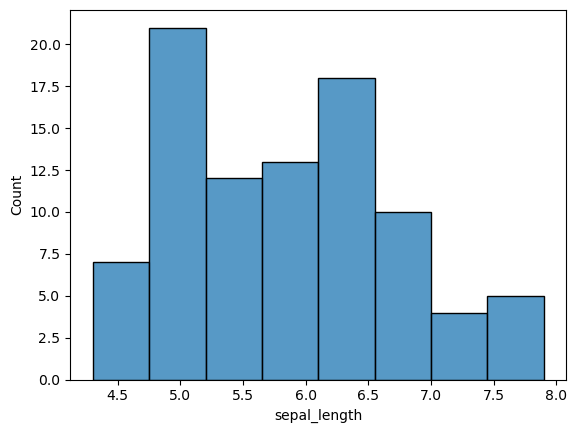

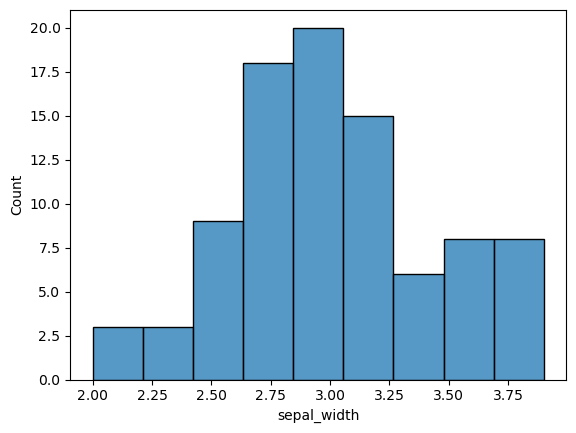

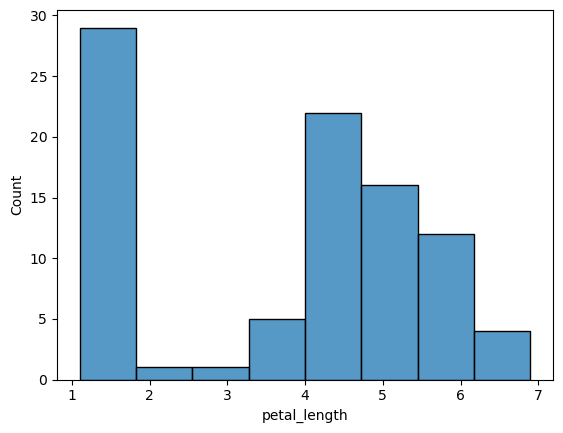

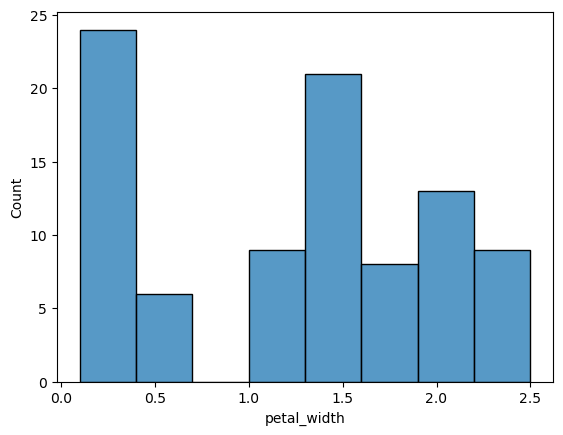

In [6]:
for i in num:
    sns.histplot(data=iris_train, x=i)
    plt.show()

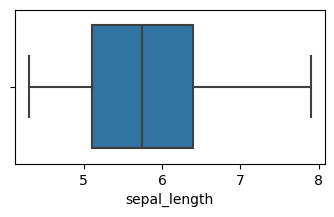

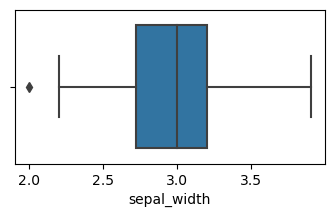

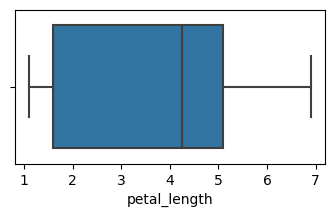

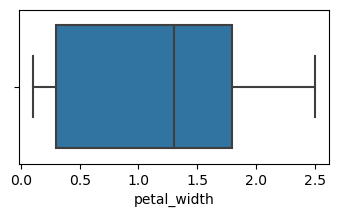

In [7]:
for i in num:
    plt.figure(figsize=(4,2))
    sns.boxplot(data=iris_train, x=i)
    plt.show()

- For each species (categorical variable): create a frequency table and a bar plot of those frequencies.


In [8]:
iris_train.species.value_counts()

virginica     30
setosa        30
versicolor    30
Name: species, dtype: int64

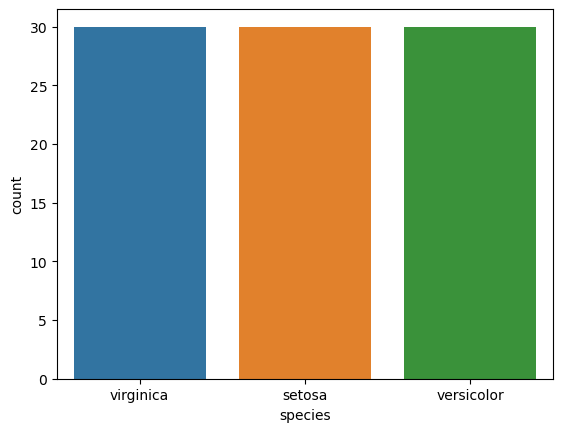

In [9]:
sns.countplot(data=iris_train, x='species')
plt.show()

- Document takeaways & any actions.

In [10]:
# petal_length and _width sem like they could be related
# equal counts of each species

Bivariate Stats
- Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).


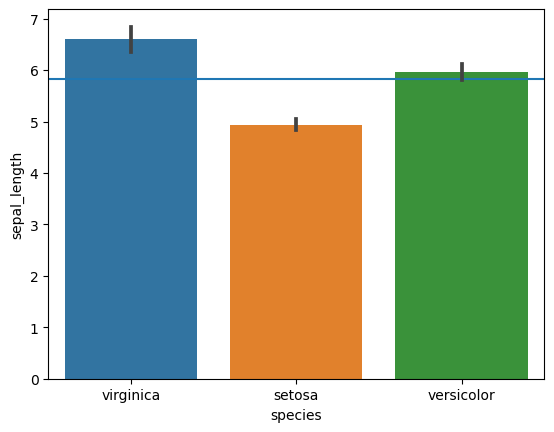

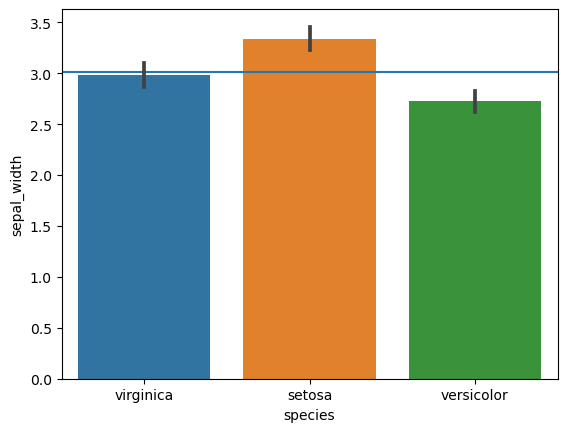

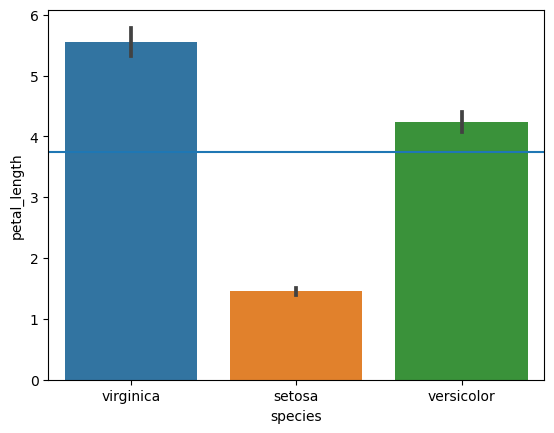

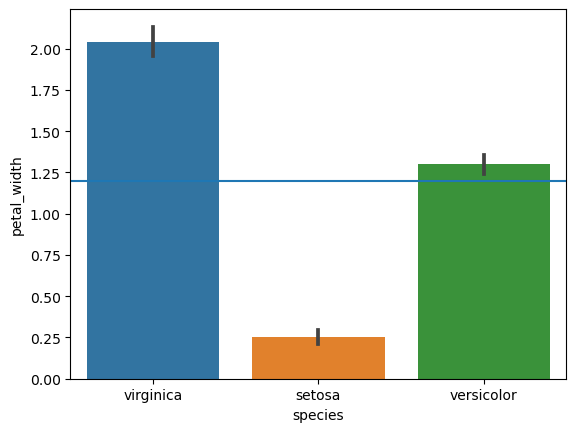

In [11]:
for i in num:
    plt.axhline(y=list(iris_train[[i]].mean()))
    sns.barplot(data=iris_train, x='species', y=i)
    plt.show()

- For each measurement type, compute the descriptive statistics for each species.


In [12]:
for i in cat:
    d = iris_train[iris_train.species == i].describe().T
    print(i,'\n',d,'\n')

virginica 
               count      mean       std  min    25%   50%    75%  max
sepal_length   30.0  6.610000  0.713104  4.9  6.300  6.60  7.050  7.9
sepal_width    30.0  2.980000  0.356612  2.5  2.725  3.00  3.200  3.8
petal_length   30.0  5.553333  0.600995  4.5  5.100  5.55  5.900  6.9
petal_width    30.0  2.043333  0.240235  1.5  1.825  2.05  2.275  2.5
versicolor     30.0  0.000000  0.000000  0.0  0.000  0.00  0.000  0.0
virginica      30.0  1.000000  0.000000  1.0  1.000  1.00  1.000  1.0 

setosa 
               count      mean       std  min  25%  50%    75%  max
sepal_length   30.0  4.940000  0.288396  4.3  4.8  5.0  5.100  5.5
sepal_width    30.0  3.336667  0.347884  2.3  3.1  3.4  3.575  3.9
petal_length   30.0  1.460000  0.158875  1.1  1.4  1.5  1.575  1.9
petal_width    30.0  0.250000  0.119626  0.1  0.2  0.2  0.300  0.6
versicolor     30.0  0.000000  0.000000  0.0  0.0  0.0  0.000  0.0
virginica      30.0  0.000000  0.000000  0.0  0.0  0.0  0.000  0.0 

versicolor 
    

- For virginica & versicolor: Compare the mean `petal_width` using the Mann-Whitney test (`scipy.stats.mannwhitneyu`) to see if there is a significant difference between the two groups. Do the same for the other measurement types.


In [13]:
#H0:no diff
#Ha:is diff

In [14]:
x=(iris_train.species == 'virginica')
y=(iris_train.species == 'versicolor')
u,p = stats.mannwhitneyu(iris_train[x].petal_width, iris_train[y].petal_width)
p

3.456365946570801e-11

In [15]:
u,p = stats.mannwhitneyu(iris_train[x].petal_length, iris_train[y].petal_length)
p

1.9585341115233944e-10

In [16]:
u,p = stats.mannwhitneyu(iris_train[x].sepal_width, iris_train[y].sepal_width)
p

0.013739683116176602

In [17]:
u,p = stats.mannwhitneyu(iris_train[x].sepal_length, iris_train[y].sepal_length)
p

0.0001674717775521336

- Document takeaways & any actions.

In [18]:
# lengths and widths of petals and sepals for both virginica and versicolor are different

Multivariate Stats
- Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.


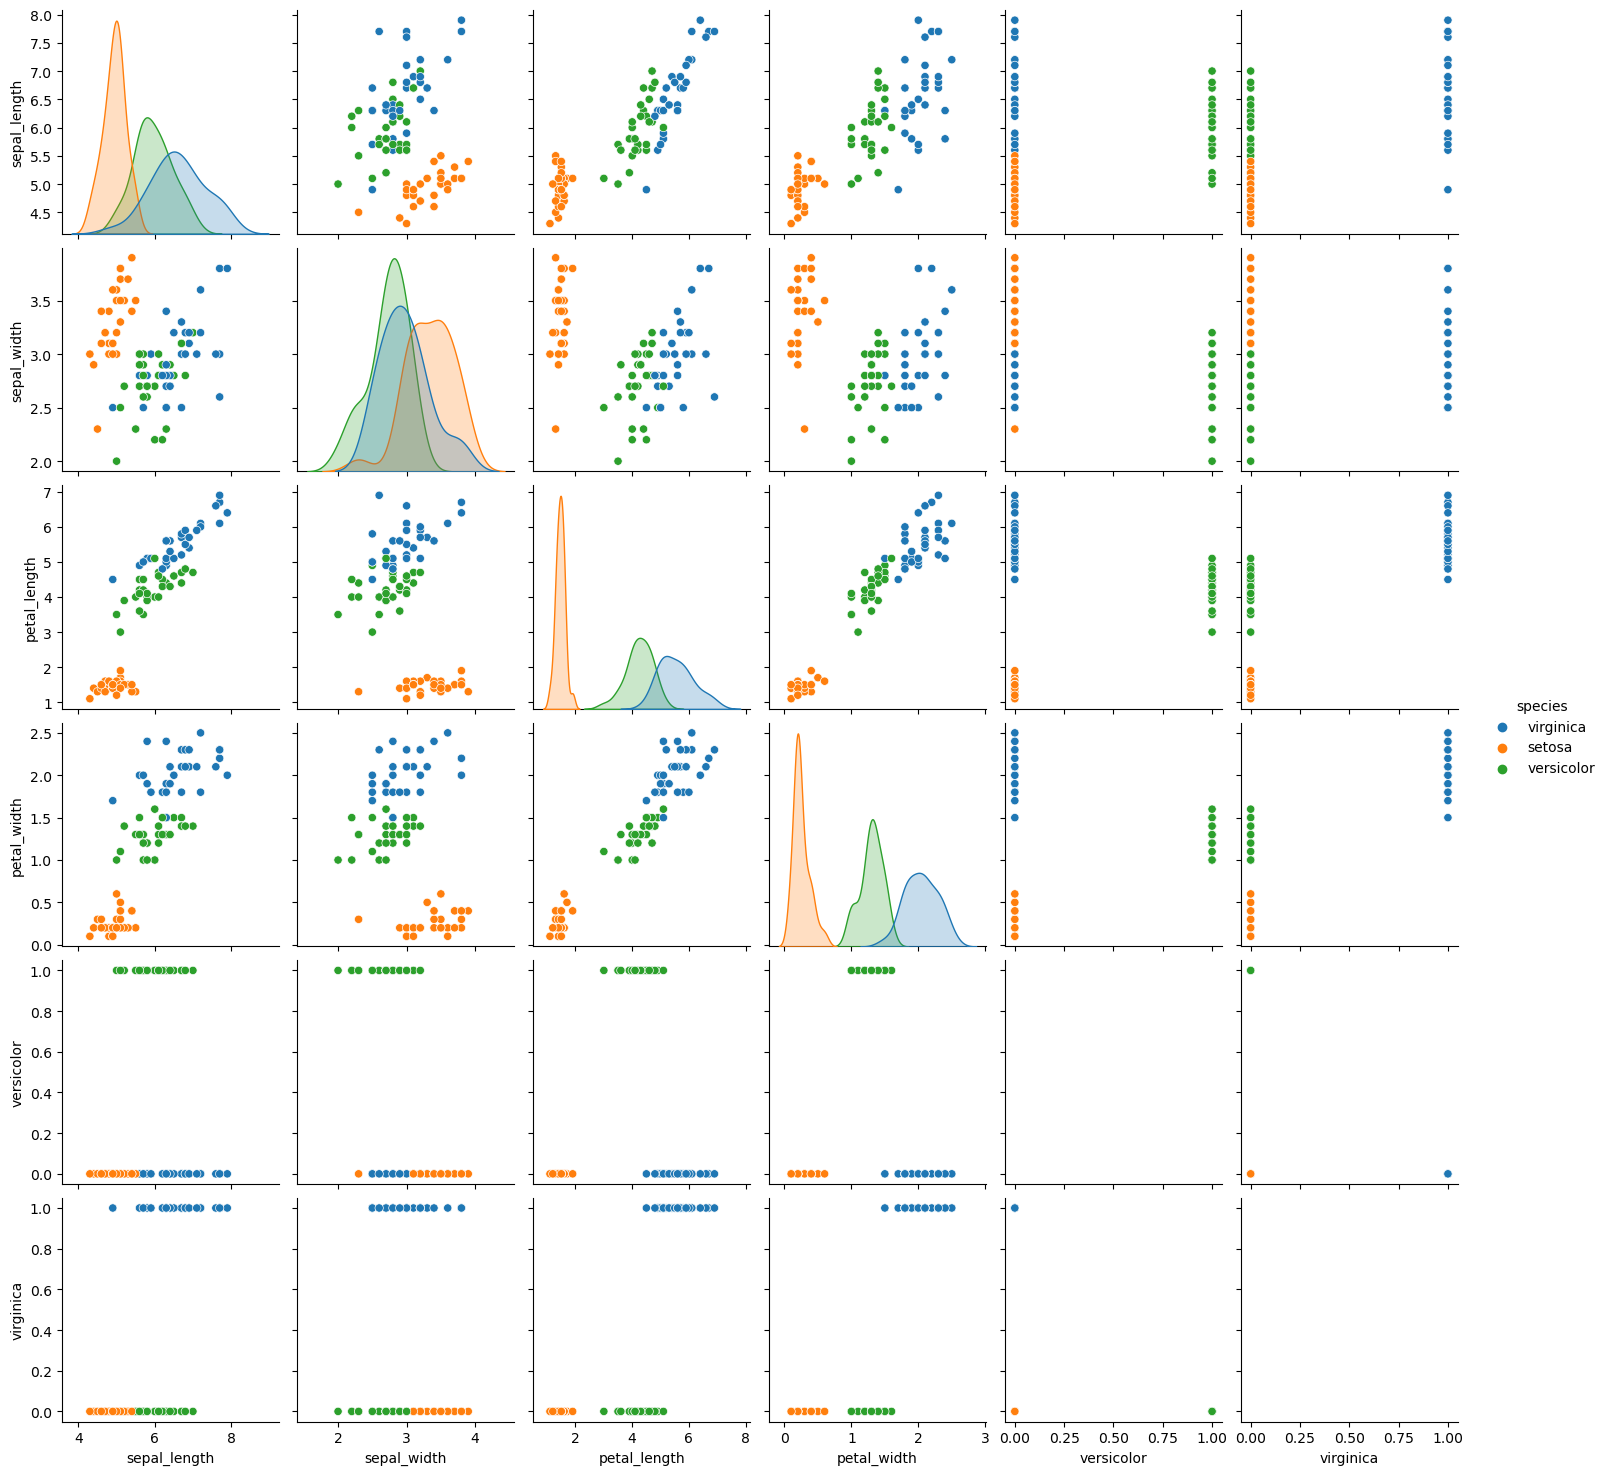

In [19]:
sns.pairplot(data=iris_train, hue='species')
plt.show()

- Visualize two numeric variables of the species. Hint: `sns.relplot` with `hue` or `col`


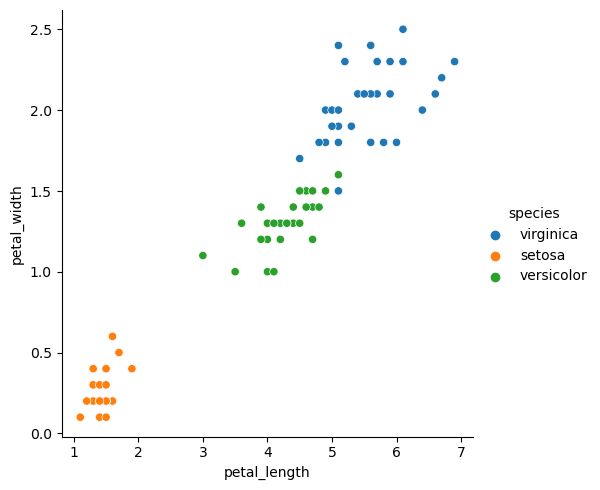

In [20]:
sns.relplot(data=iris_train ,x='petal_length', y='petal_width', hue='species')
plt.show()

- Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.


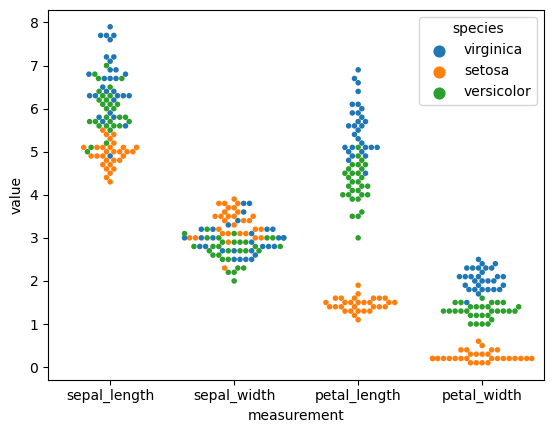

In [21]:
melted = iris_train.melt(id_vars=['species'],value_vars=num, var_name='measurement')
sns.swarmplot(data=melted, x='measurement', y='value', hue='species', size=4)
plt.show()

In [22]:
melted

,species,measurement,value
0,virginica,sepal_length,6.7
1,setosa,sepal_length,5.0
2,versicolor,sepal_length,6.5
3,setosa,sepal_length,5.1
4,virginica,sepal_length,6.7
...,...,...,...
355,versicolor,petal_width,1.0
356,versicolor,petal_width,1.4
357,virginica,petal_width,1.8
358,setosa,petal_width,0.1


- Ask a specific question of the data, such as: is the sepal area significantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).


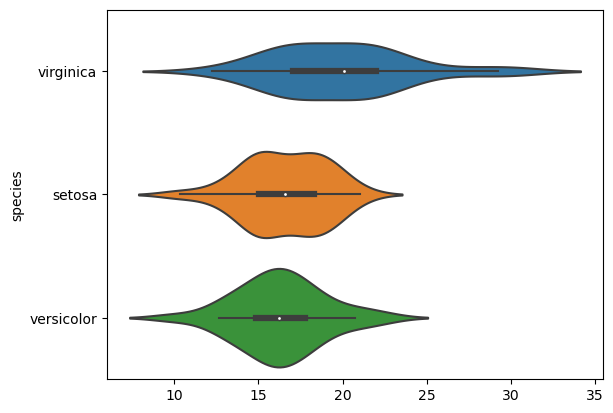

In [23]:
# is sepal area (l * w) significantly different between setosa and versicolor?
sepal_lw = iris_train.sepal_length * iris_train.sepal_width
sns.violinplot(data=iris_train, x=sepal_lw, y='species')
plt.show()

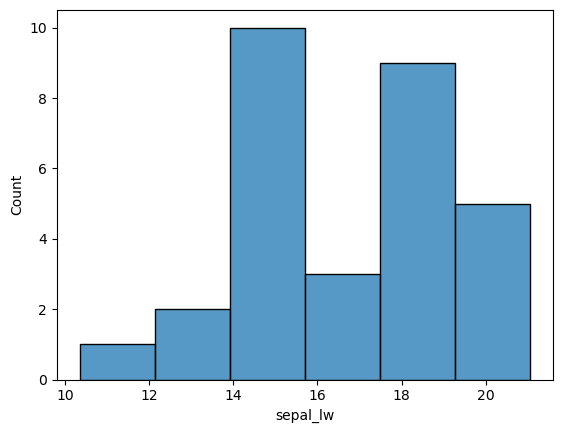

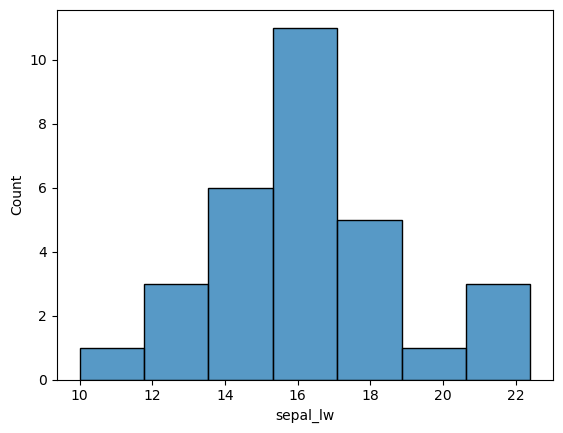

In [24]:
iris_train['sepal_lw'] = sepal_lw
sns.histplot(data=iris_train[iris_train.species=='setosa'], x='sepal_lw')
plt.show()
sns.histplot(data=iris_train[iris_train.species=='versicolor'], x='sepal_lw')
plt.show()

In [25]:
#H0:no diff; Ha:is diff
u,p = stats.mannwhitneyu(iris_train[iris_train.species=='setosa'].sepal_lw, iris_train[iris_train.species=='versicolor'].sepal_lw)
p

0.5944987952649989

- Document takeaways and any actions.

In [26]:
# there is no significant difference between sepal areas of setosa and versicolor

#### Part II (bonus)
Explore your `titanic` dataset more completely.

In [3]:
titanic = acquire.get_titanic_data()
titanic

creating df and exporting csv


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,None,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,None,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [4]:
titanic = prepare.prep_titanic(titanic)
titanic

data cleaned and prepped


,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
0,0,0,3,male,1,0,7.2500,S,0,1,0,1
1,1,1,1,female,1,0,71.2833,C,0,0,0,0
2,2,1,3,female,0,0,7.9250,S,1,0,0,1
3,3,1,1,female,1,0,53.1000,S,0,0,0,1
4,4,0,3,male,0,0,8.0500,S,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,0,0,13.0000,S,1,1,0,1
887,887,1,1,female,0,0,30.0000,S,1,0,0,1
888,888,0,3,female,1,2,23.4500,S,0,0,0,1
889,889,1,1,male,0,0,30.0000,C,1,1,0,0


In [5]:
titanic_train, titanic_v, titanic_t = prepare.split_data(titanic, 'survived')
titanic_train

data split
train -> (534, 12); 59.93%
validate -> (178, 12); 19.98%
test -> (179, 12); 20.09%


,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
577,577,1,1,female,1,0,55.9000,S,0,0,0,1
63,63,0,3,male,3,2,27.9000,S,0,1,0,1
424,424,0,3,male,1,1,20.2125,S,0,1,0,1
513,513,1,1,female,1,0,59.4000,C,0,0,0,0
610,610,0,3,female,1,5,31.2750,S,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
451,451,0,3,male,1,0,19.9667,S,0,1,0,1
780,780,1,3,female,0,0,7.2292,C,1,0,0,0
819,819,0,3,male,3,2,27.9000,S,0,1,0,1
812,812,0,2,male,0,0,10.5000,S,1,1,0,1


- Determine drivers of the target variable


- Determine if certain columns should be dropped


- Determine if it would be valuable to bin some numeric columns


- Determine if it would be valuable to combine multiple columns into one.

In [ ]:
# used VSCODE Data Wrangler and SandDance to look at the data

Does it make sense to combine any features?



In [ ]:
# alone is like inverse of sibsp and parch

Do you find any surprises?



In [ ]:
# not really

Document any and all findings and takeaways in your notebook using markdown.

In [ ]:
# more females survived, higher class had higher survival

#### Part III
Explore your `telco` data to discover drivers of churn

In [27]:
telco = acquire.get_telco_data()
for i in telco.columns.to_list():
    print(i,telco[i].unique())

csv file found and loaded
payment_type_id [2 1 4 3]
internet_service_type_id [1 2 3]
contract_type_id [2 1 3]
customer_id ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
gender ['Female' 'Male']
senior_citizen [0 1]
partner ['Yes' 'No']
dependents ['Yes' 'No']
tenure [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
phone_service ['Yes' 'No']
multiple_lines ['No' 'Yes' 'No phone service']
online_security ['No' 'Yes' 'No internet service']
online_backup ['Yes' 'No' 'No internet service']
device_protection ['No' 'Yes' 'No internet service']
tech_support ['Yes' 'No' 'No internet service']
streaming_tv ['Yes' 'No' 'No internet service']
streaming_movies ['No' 'Yes' 'No internet service']
paperless_billing ['Yes' 'No']
monthly_charges [65.6  59.9  73.9  ... 91.75 68.8  67.85]
total_c

In [28]:
telco = prepare.prep_telco(telco)
for i in telco.columns.to_list():
    print(i,telco[i].unique())

data cleaned and prepped
gender ['Female' 'Male']
senior_citizen [0 1]
partner ['Yes' 'No']
dependents ['Yes' 'No']
tenure [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
phone_service ['Yes' 'No']
multiple_lines ['No' 'Yes' 'No phone service']
online_security ['No' 'Yes' 'No internet service']
online_backup ['Yes' 'No' 'No internet service']
device_protection ['No' 'Yes' 'No internet service']
tech_support ['Yes' 'No' 'No internet service']
streaming_tv ['Yes' 'No' 'No internet service']
streaming_movies ['No' 'Yes' 'No internet service']
paperless_billing ['Yes' 'No']
monthly_charges [65.6  59.9  73.9  ... 91.75 68.8  67.85]
total_charges [ 593.3   542.4   280.85 ...  742.9  4627.65 3707.6 ]
churn ['No' 'Yes']
contract_type ['One year' 'Month-to-month' 'Two year']
internet_service_type ['DSL' 'Fiber optic' 'Non

In [29]:
telco_train, telco_v, telco_t = prepare.split_data(telco, 'churn')

data split
train -> (4225, 47); 59.99%
validate -> (1409, 47); 20.01%
test -> (1409, 47); 20.01%


- Determine if certain columns should be dropped


- Determine if it would be valuable to bin some numeric columns


- Determine if it would be valuable to combine multiple columns into one.


In [30]:
num = ['senior_citizen','tenure','monthly_charges','total_charges','gender_Male','partner_Yes','dependents_Yes','phone_service_Yes','multiple_lines_No phone service','multiple_lines_Yes','online_security_No internet service','online_security_Yes','online_backup_No internet service','online_backup_Yes','device_protection_No internet service','device_protection_Yes','tech_support_No internet service','tech_support_Yes','streaming_tv_No internet service','streaming_tv_Yes','streaming_movies_No internet service','streaming_movies_Yes','paperless_billing_Yes','churn_Yes','contract_type_One year','contract_type_Two year','internet_service_type_Fiber optic','internet_service_type_None','payment_type_Credit card (automatic)','payment_type_Electronic check','payment_type_Mailed check']
cat = ['gender','partner','dependents','phone_service','multiple_lines','online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies','paperless_billing','churn','contract_type','internet_service_type','payment_type']

In [31]:
tenure_bin = pd.cut(telco_train.tenure, bins=8)
tenure_bin

2332      (9.0, 18.0]
5275    (-0.072, 9.0]
6429     (54.0, 63.0]
89       (18.0, 27.0]
6412     (45.0, 54.0]
            ...      
5592    (-0.072, 9.0]
1739     (54.0, 63.0]
4993     (54.0, 63.0]
2582     (45.0, 54.0]
6377     (45.0, 54.0]
Name: tenure, Length: 4225, dtype: category
Categories (8, interval[float64, right]): [(-0.072, 9.0] < (9.0, 18.0] < (18.0, 27.0] < (27.0, 36.0] < (36.0, 45.0] < (45.0, 54.0] < (54.0, 63.0] < (63.0, 72.0]]

What are your drivers of churn?



In [32]:
telco_train

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
2332,Male,0,No,No,12,Yes,Yes,No,No,No,...,1,0,0,0,0,1,0,0,1,0
5275,Male,0,No,No,1,Yes,Yes,No,No,No,...,0,1,0,0,0,0,0,1,0,0
6429,Male,0,No,No,59,Yes,Yes,No,No,Yes,...,0,0,0,0,1,0,0,1,0,0
89,Female,1,No,No,27,Yes,Yes,No,Yes,Yes,...,0,1,0,0,0,1,0,0,0,0
6412,Female,0,No,No,54,Yes,Yes,No,Yes,Yes,...,1,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5592,Female,0,No,Yes,4,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,0,0,0,1,0,0,0
1739,Male,0,Yes,Yes,56,Yes,Yes,No,No,Yes,...,1,1,0,0,1,1,0,0,1,0
4993,Male,0,Yes,Yes,56,Yes,No,Yes,Yes,Yes,...,0,1,0,0,1,0,0,0,0,0
2582,Female,1,Yes,No,52,Yes,Yes,No,Yes,Yes,...,1,1,0,1,0,1,0,0,1,0


In [33]:
(telco_train.churn_Yes==1).mean()

0.26532544378698225

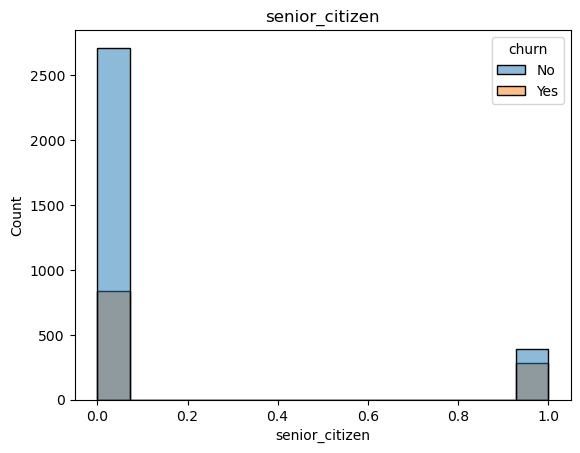

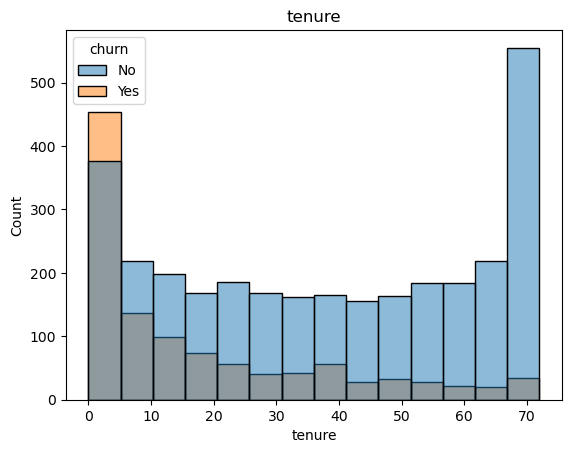

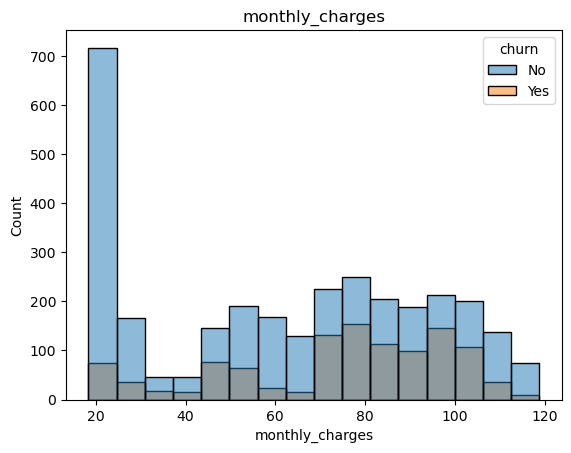

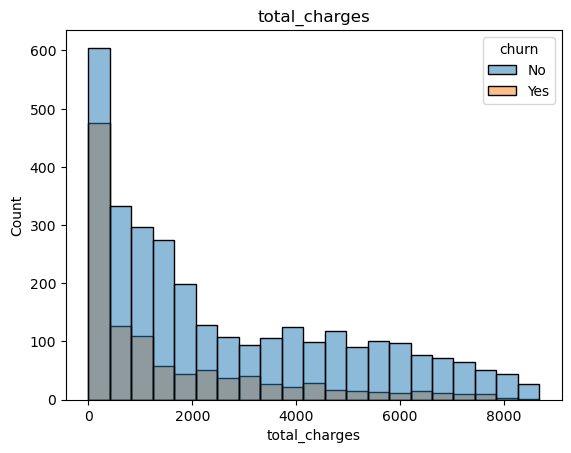

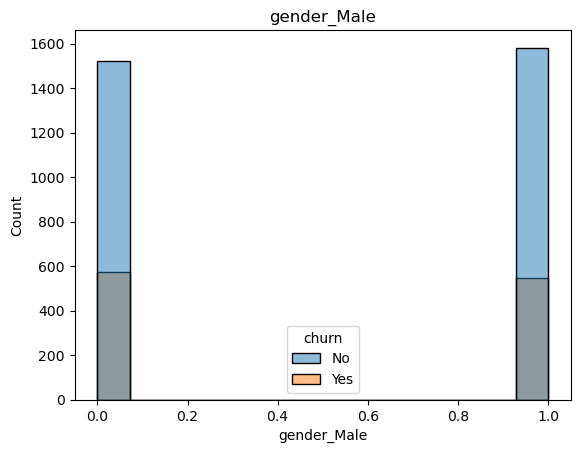

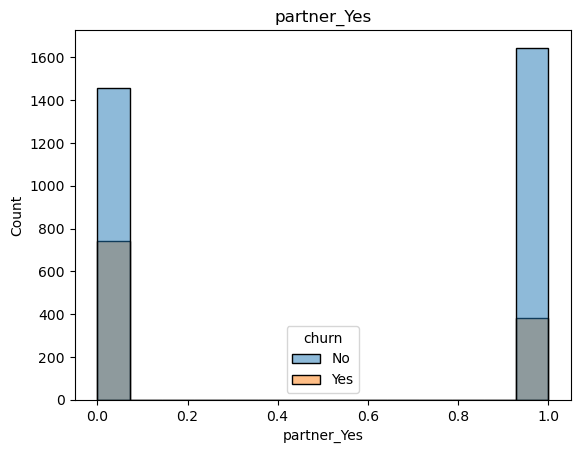

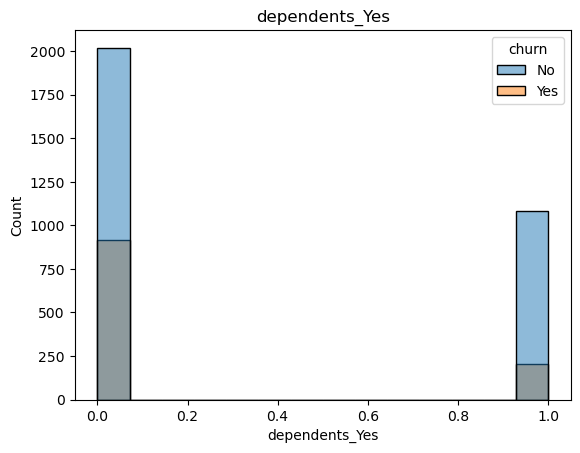

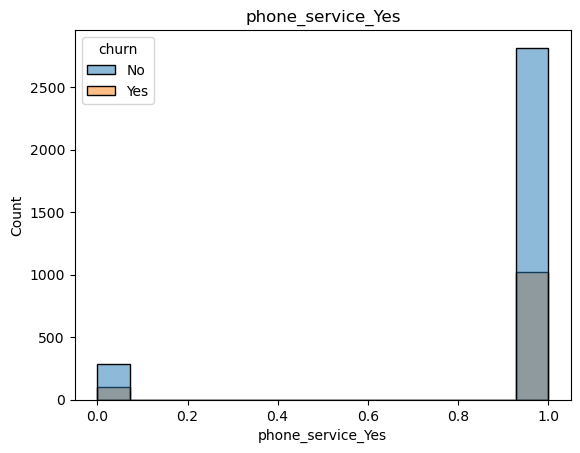

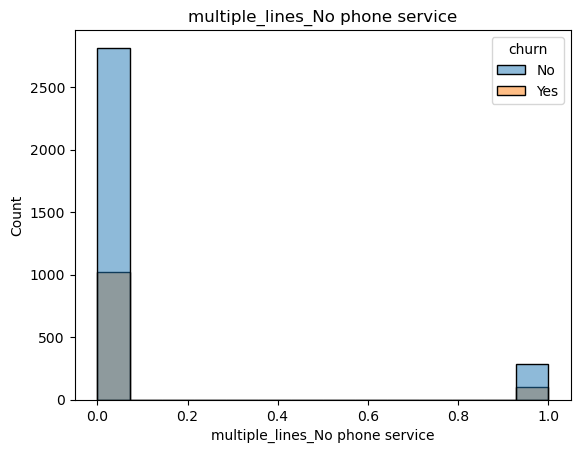

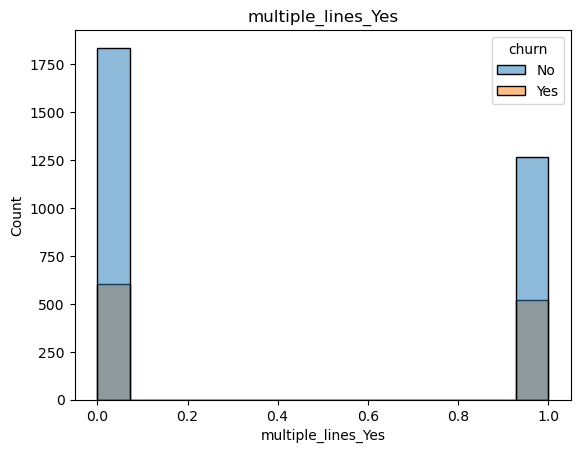

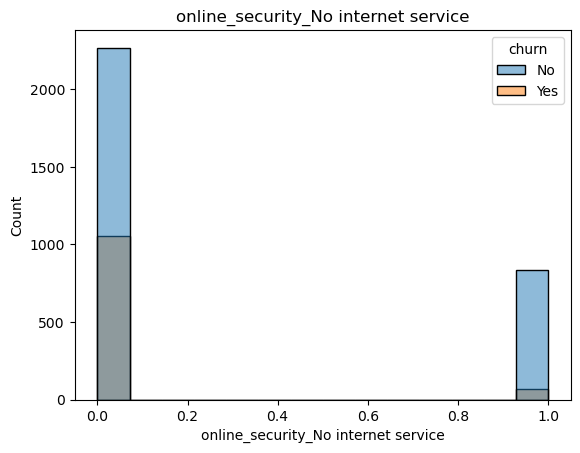

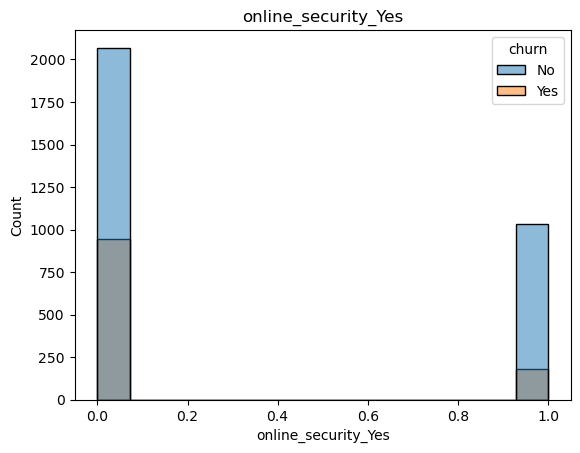

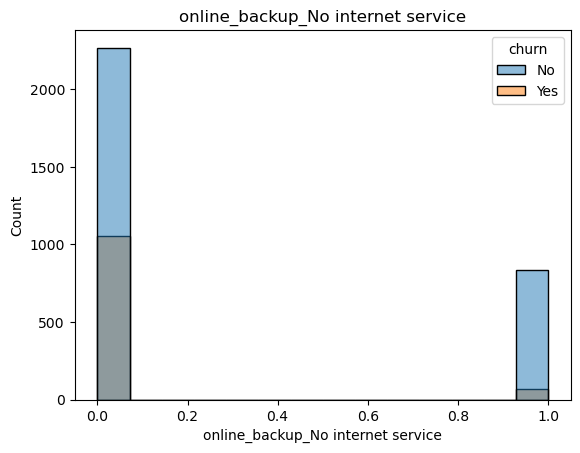

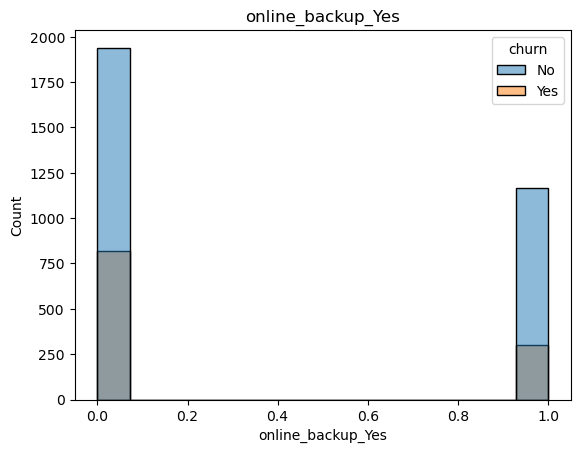

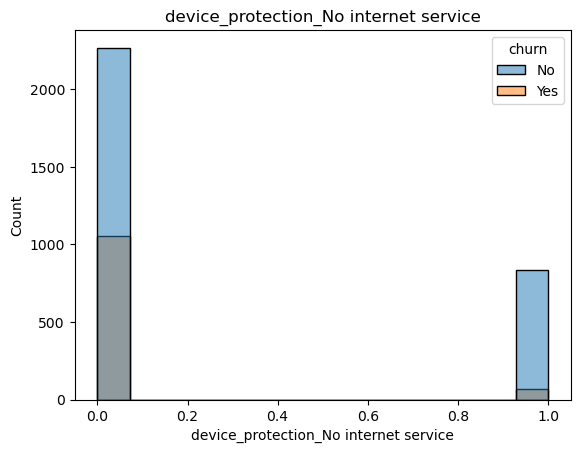

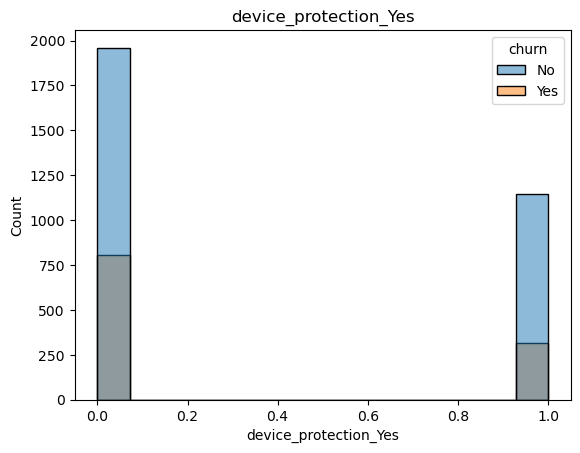

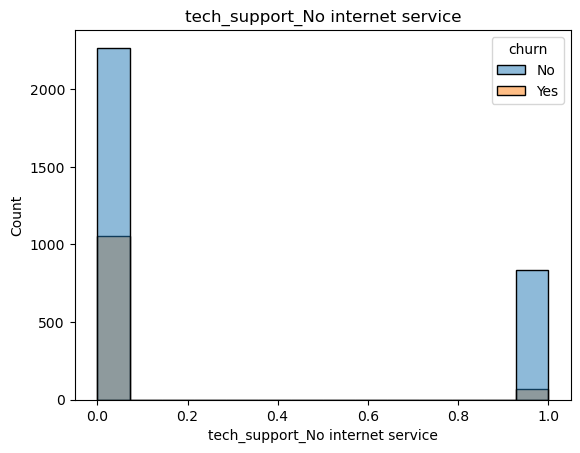

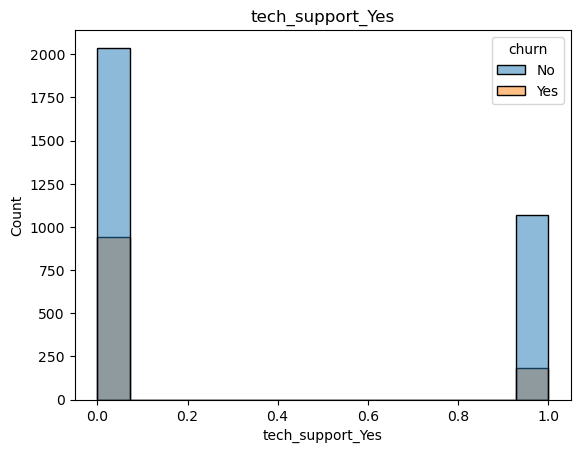

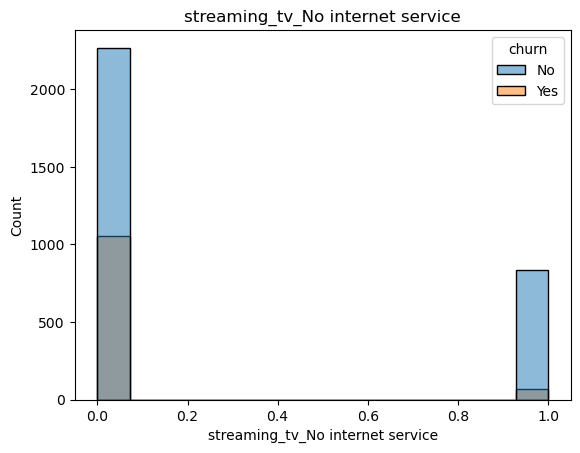

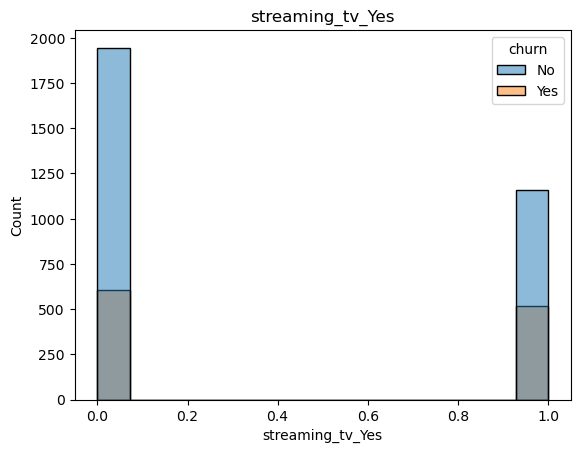

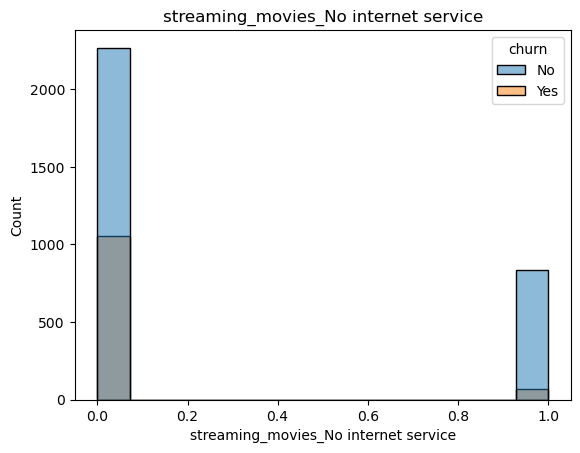

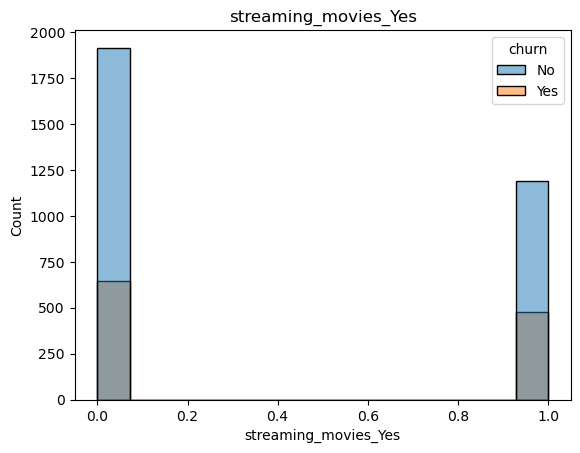

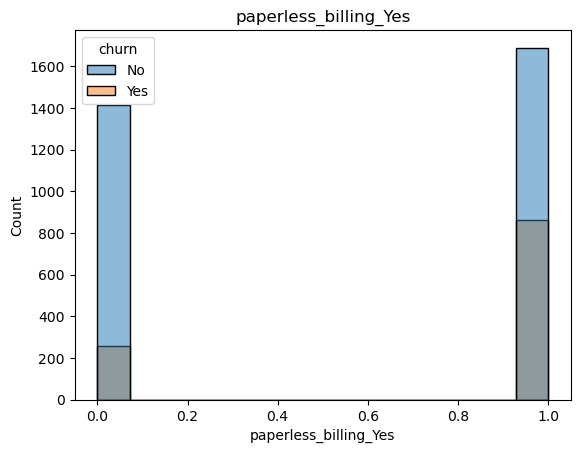

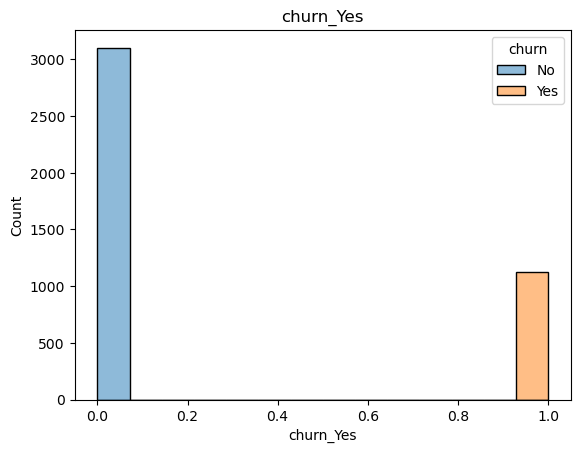

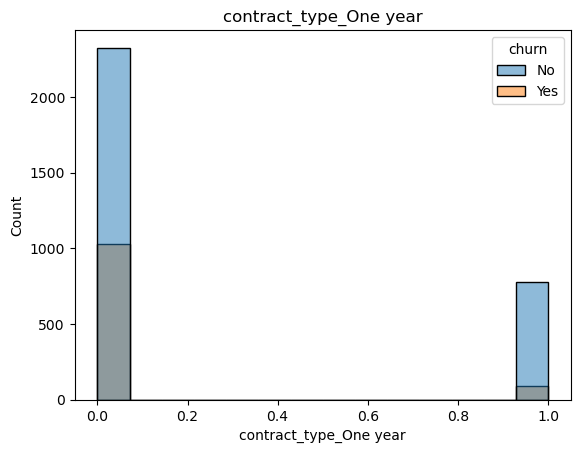

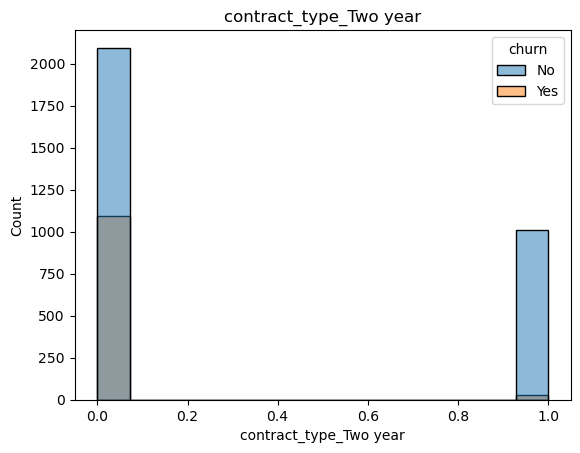

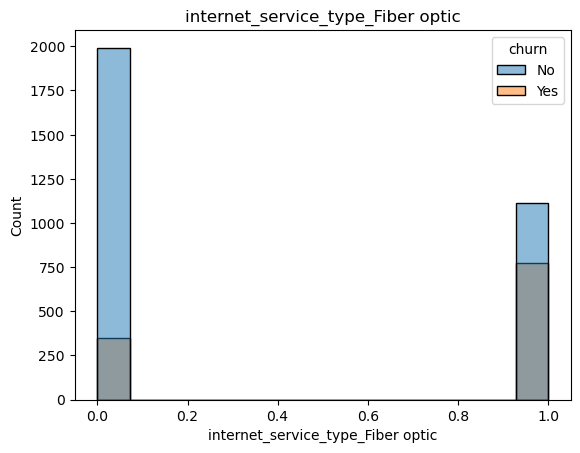

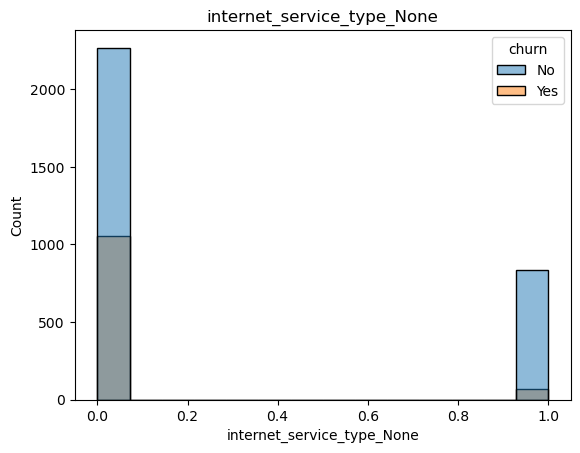

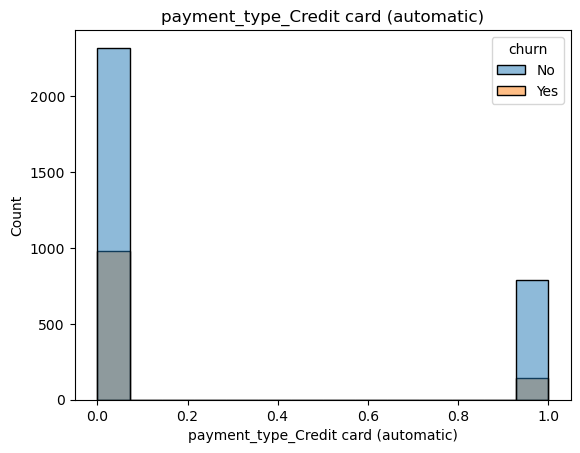

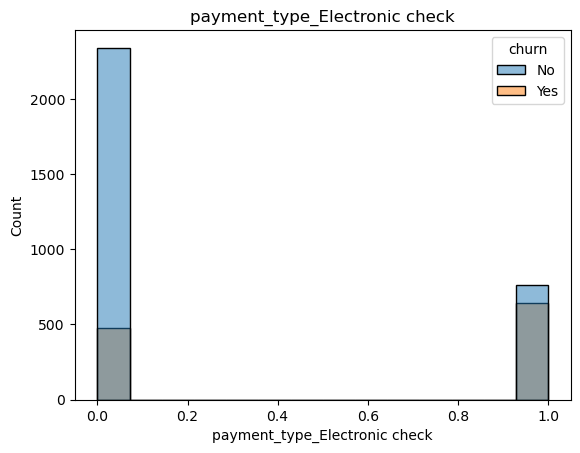

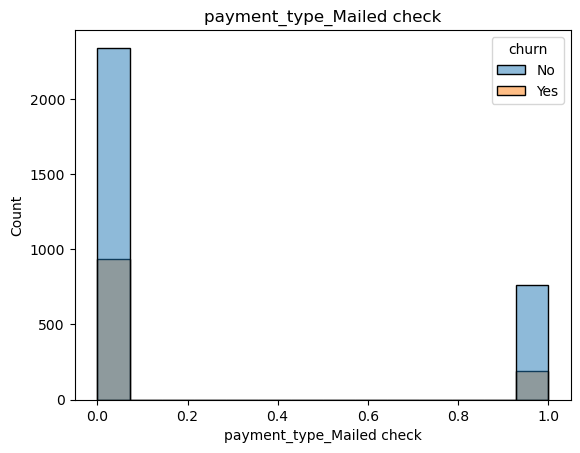

In [34]:
for i in num:
    sns.histplot(data=telco_train, x=i, hue='churn')
    plt.title(i)
    plt.show()

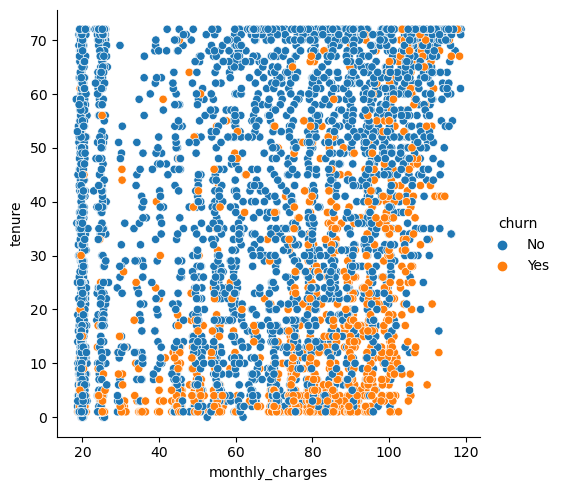

In [35]:
sns.relplot(data=telco_train, x='monthly_charges',y='tenure', hue='churn')
plt.show()

In [36]:
#H0:no diff; Ha:is diff
u,p = stats.mannwhitneyu(telco_train[telco_train.churn=='Yes'].monthly_charges,telco_train[telco_train.churn=='No'].monthly_charges)
p

1.261599899747347e-28

In [37]:
obs = pd.crosstab(telco_train.churn,telco_train.internet_service_type)
obs

internet_service_type,DSL,Fiber optic,None
churn,,,
No,1157,1111,836
Yes,280,771,70


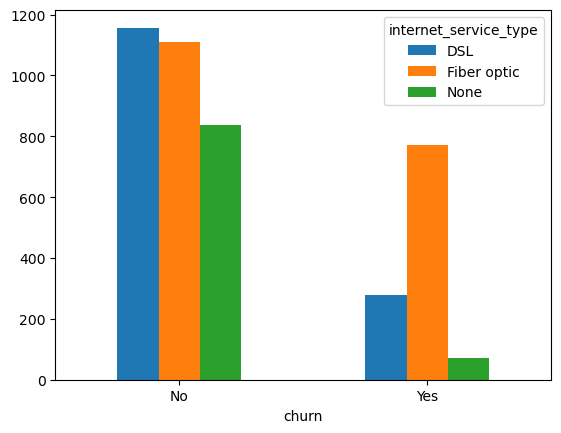

In [38]:
obs.plot.bar(rot=0)
plt.show()

In [39]:
#H0:independent; Ha:not independent
chi2, p, degf, exp = stats.chi2_contingency(obs)
# print 'Observed Values' followed by a new line
print('Observed Values\n')
# print the values from the 'observed' dataframe
print(obs.values)
# print --- and then a new line, 'Expected Values', followed by another new line
print('---\nExpected Values\n')
# print the expected values array
print(exp.astype(int))
# print a new line
print('---\n')
# print the chi2 value, formatted to a float with 4 digits. 
print(f'chi^2 = {chi2:.4f}') 
# print the p-value, formatted to a float with 4 digits. 
print(f'p     = {p:.4f}')

Observed Values

[[1157 1111  836]
 [ 280  771   70]]
---
Expected Values

[[1055 1382  665]
 [ 381  499  240]]
---

chi^2 = 402.1625
p     = 0.0000


Does it make sense to combine any features?



In [40]:
# possibly combine payment types 0=month-to-month, 1=one-year, 2=2-years
# maybe combine internet features like streaming

Do you find any surprises?



In [ ]:
# fiber optic has high churn rate compared to other internet service types

Document any and all findings and takeaways in your notebook using markdown.

In [ ]:
# high monthly charges can lead to churn
# having fiber optic can lead to churn